In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_row', 100)
pd.set_option('display.max_info_columns', 100)

In [49]:
train_duo_squad = pd.read_csv('C:/Users/hojun/Documents/dev/Kaggle-PUBG/rank_duo_squad_df.csv')

In [3]:
def drow_boxplot(df, feature):
    plt.figure(figsize=(20, 12))
    plt.subplot(211)
    sns.boxplot(data=df, x=feature, y='winPlacePerc')
    plt.subplot(212)
    sns.countplot(data=df, x=feature)
    plt.show()

In [4]:
def merge_count_rate(df, feature):
    return pd.merge(df[feature].value_counts().round(3), df[feature].value_counts(normalize = True).round(3), right_index = True,
               left_index = True)

<AxesSubplot:>

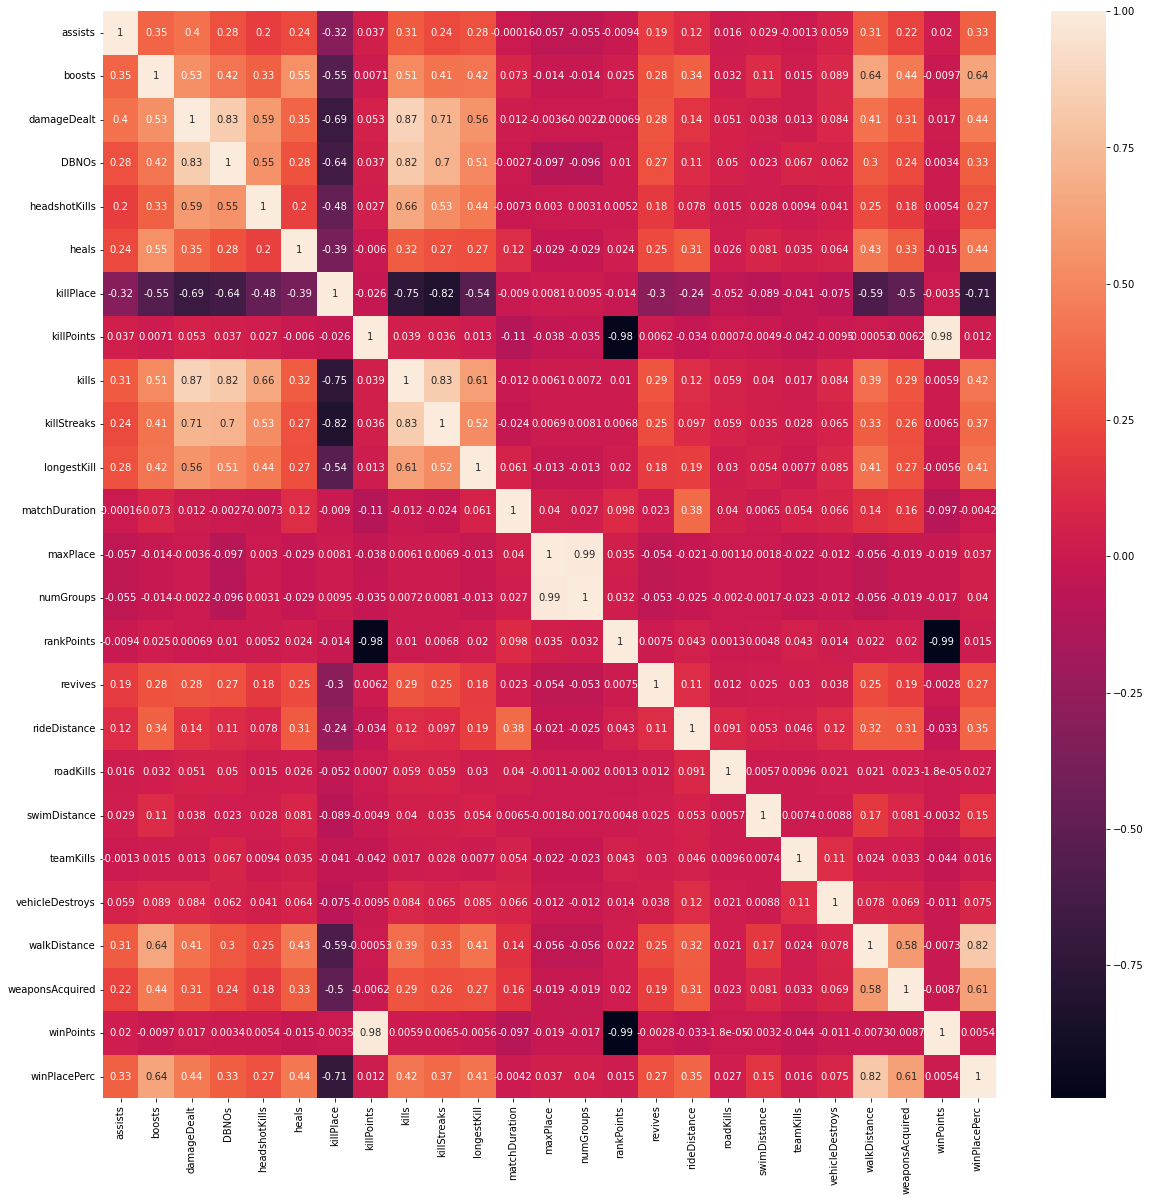

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=train_duo_squad.corr(), annot=True)

In [6]:
train_duo_squad.corr().nlargest(train_duo_squad.columns.size, 'winPlacePerc')['winPlacePerc']

winPlacePerc       1.000000
walkDistance       0.819974
boosts             0.637001
weaponsAcquired    0.611612
damageDealt        0.442268
heals              0.437253
kills              0.418646
longestKill        0.408389
killStreaks        0.370600
rideDistance       0.351371
assists            0.333241
DBNOs              0.325735
revives            0.269733
headshotKills      0.269583
swimDistance       0.147998
vehicleDestroys    0.075231
numGroups          0.039882
maxPlace           0.037109
roadKills          0.026971
teamKills          0.016421
rankPoints         0.014585
killPoints         0.012143
winPoints          0.005410
matchDuration     -0.004237
killPlace         -0.713758
Name: winPlacePerc, dtype: float64

In [7]:
train_duo_squad.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

- 경기수 : 39210
- 총 인원 : 3692994

In [8]:
train_duo_squad['Id'].size, train_duo_squad['matchId'].nunique() 


(3692994, 39210)

- 각 경기별 참가 인원 feature 생성

In [50]:
train = train_duo_squad.copy()
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

- 경기별 참가인원 분포 확인

c:\Users\hojun\miniforge3\envs\fastcampus\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


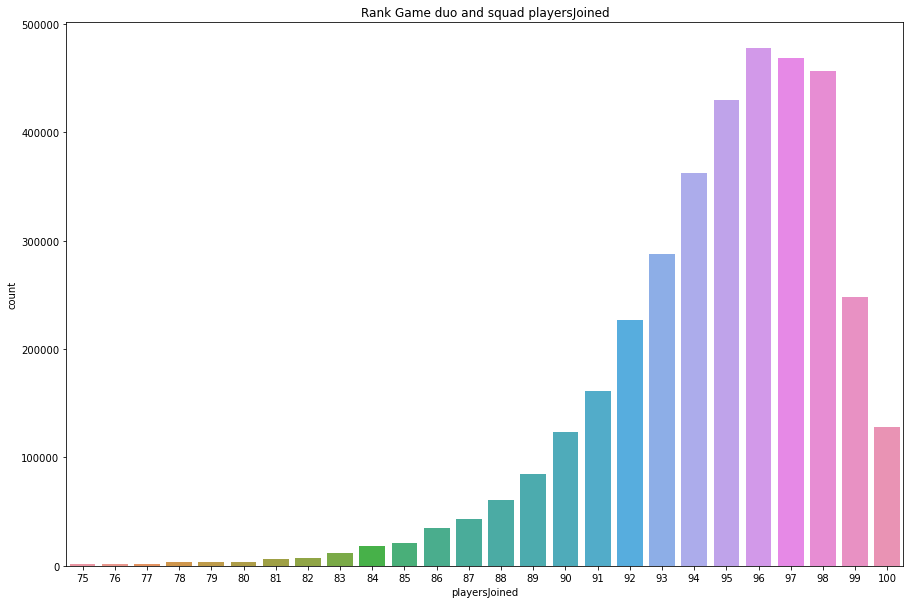

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('Rank Game duo and squad playersJoined')
plt.show()

In [11]:
train_plaers_joined = train[train['playersJoined']>=75]['playersJoined']
pd.merge(train_plaers_joined.value_counts(), round(train_plaers_joined.value_counts(normalize=True), 3),right_index = True,
               left_index = True)

,playersJoined_x,playersJoined_y
96,477600,0.130
97,468801,0.128
98,456582,0.124
95,429780,0.117
94,361994,0.098
93,287184,0.078
99,248391,0.068
92,227056,0.062
91,161616,0.044
100,128200,0.035


- 각 경기 100명 인원으로 가정하고 관련 column들 정규화
    - kills, damageDealt, maxPlace, matchDuration

In [12]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)

# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.00,0.0000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.47,99.7023,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.00,69.3600,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.90,35.8610,31,33.79,1436,1565.24
4,ff79c12f326506,1,1.05,100.00,105.0000,28,29.40,1395,1464.75
5,95959be0e21ca3,0,0.00,0.00,0.0000,28,28.84,1316,1355.48
6,1a68204ccf9891,0,0.00,51.60,53.1480,28,28.84,1375,1416.25
7,e5bb5a43587253,0,0.00,37.27,38.3881,29,29.87,1930,1987.90
8,2b574d43972813,0,0.00,28.38,28.6638,29,29.29,1811,1829.11
9,8de328a74658a9,0,0.00,137.90,144.7950,48,50.40,1384,1453.20


In [13]:
for i in ['kills', 'damageDealt', 'maxPlace', 'matchDuration']:
    train.drop(columns=i, inplace=True)
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playersJoined', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm'],
      dtype='object')

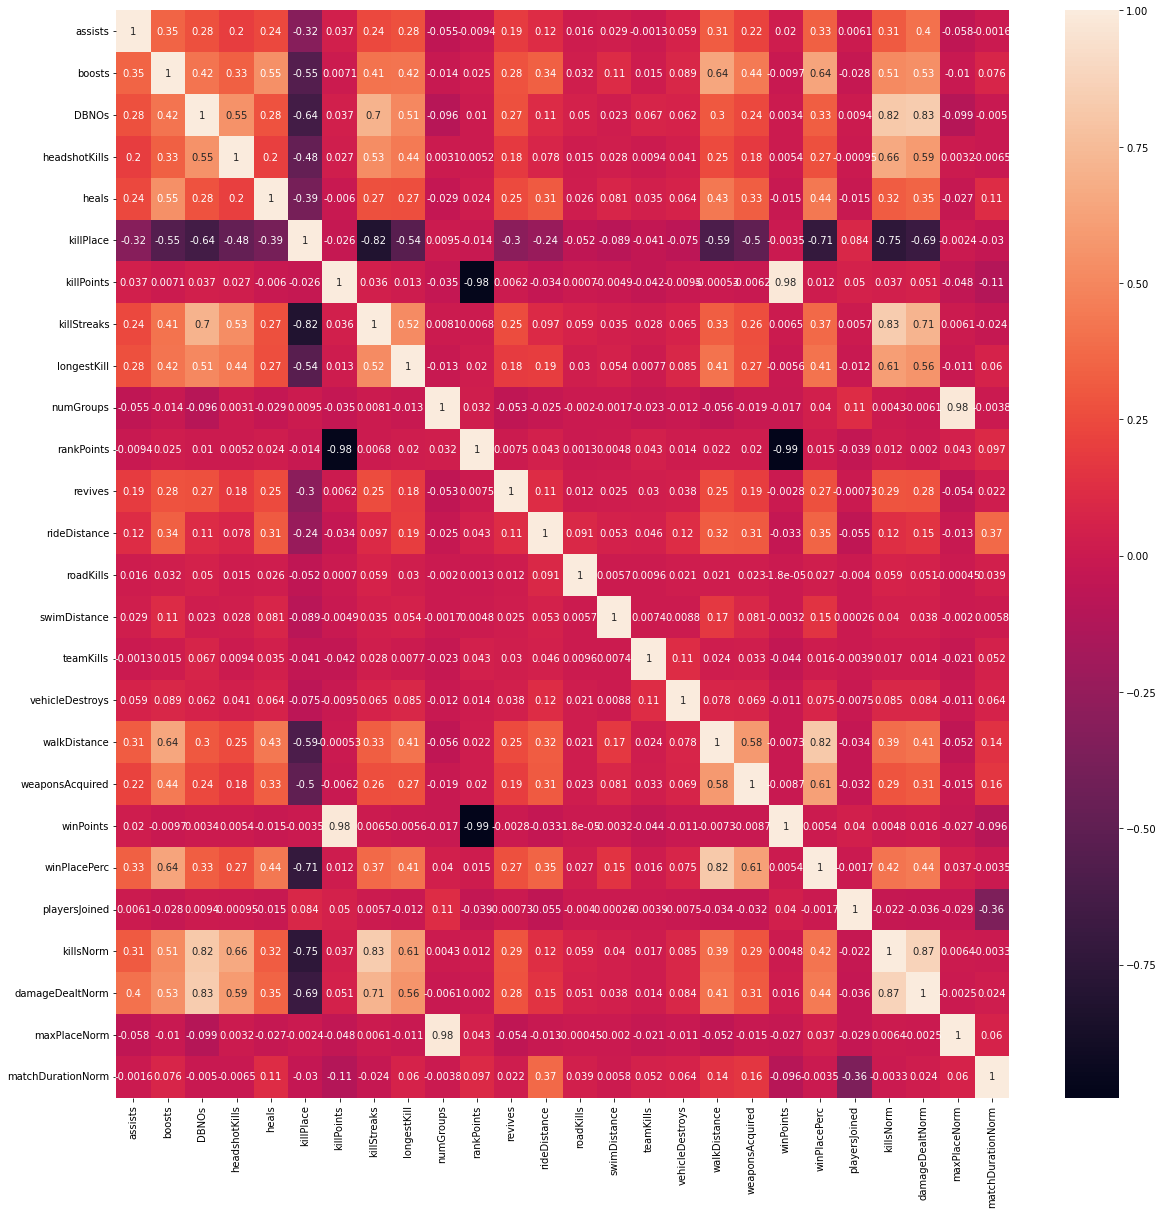

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [15]:
train.corr().nlargest(train.columns.size, 'winPlacePerc')['winPlacePerc']

winPlacePerc         1.000000
walkDistance         0.819974
boosts               0.637001
weaponsAcquired      0.611612
damageDealtNorm      0.441625
heals                0.437253
killsNorm            0.418335
longestKill          0.408389
killStreaks          0.370600
rideDistance         0.351371
assists              0.333241
DBNOs                0.325735
revives              0.269733
headshotKills        0.269583
swimDistance         0.147998
vehicleDestroys      0.075231
numGroups            0.039882
maxPlaceNorm         0.037356
roadKills            0.026971
teamKills            0.016421
rankPoints           0.014585
killPoints           0.012143
winPoints            0.005410
playersJoined       -0.001666
matchDurationNorm   -0.003493
killPlace           -0.713758
Name: winPlacePerc, dtype: float64

- 해당 column 중 rankPoints, killPoints, killPlace는 예측값과의 상관 관계가 거의 없음 
- 이 column들은 결과값을 집게하거나 다른 column으로 대처 가능하여 drop 하기로함

In [16]:
temp = train.copy()
for i in ['rankPoints', 'killPoints', 'killPlace']:
    temp.drop(columns=i, inplace=True)
temp.corr().nlargest(temp.columns.size, 'winPlacePerc')['winPlacePerc']


winPlacePerc         1.000000
walkDistance         0.819974
boosts               0.637001
weaponsAcquired      0.611612
damageDealtNorm      0.441625
heals                0.437253
killsNorm            0.418335
longestKill          0.408389
killStreaks          0.370600
rideDistance         0.351371
assists              0.333241
DBNOs                0.325735
revives              0.269733
headshotKills        0.269583
swimDistance         0.147998
vehicleDestroys      0.075231
numGroups            0.039882
maxPlaceNorm         0.037356
roadKills            0.026971
teamKills            0.016421
winPoints            0.005410
playersJoined       -0.001666
matchDurationNorm   -0.003493
Name: winPlacePerc, dtype: float64

In [17]:
temp.describe()

,assists,boosts,DBNOs,headshotKills,heals,killStreaks,longestKill,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm
count,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06,3.692994e+06
mean,2.621661e-01,1.113511e+00,7.814502e-01,2.196835e-01,1.430524e+00,5.552370e-01,2.310774e+01,3.380731e+01,1.962473e-01,6.219311e+02,2.598975e-03,4.399194e+00,2.601927e-02,8.302207e-03,1.192077e+03,3.645465e+00,6.167978e+02,4.697901e-01,9.452476e+01,9.598195e-01,1.388063e+02,3.693458e+01,1.664083e+03
std,6.083753e-01,1.697376e+00,1.187491e+00,5.760786e-01,2.713597e+00,7.329686e-01,5.143805e+01,9.257832e+00,5.084873e-01,1.503329e+03,5.942016e-02,2.962411e+01,1.752744e-01,9.446862e-02,1.201153e+03,2.309399e+00,7.415952e+02,3.089208e-01,4.579252e+00,1.585660e+00,1.763121e+02,1.007650e+01,2.863045e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,3.860000e+00,1.059480e+03
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.667000e+02,2.000000e+00,0.000000e+00,1.923000e-01,9.300000e+01,0.000000e+00,0.000000e+00,2.900000e+01,1.419600e+03
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.263000e+02,3.000000e+00,0.000000e+00,4.483000e-01,9.500000e+01,0.000000e+00,9.045000e+01,3.060000e+01,1.516480e+03
75%,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.121000e+01,4.500000e+01,0.000000e+00,1.223000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.053000e+03,5.000000e+00,1.495000e+03,7.407000e-01,9.700000e+01,1.090000e+00,1.983450e+02,4.998000e+01,1.940860e+03
max,1.200000e+01,3.300000e+01,3.200000e+01,2.600000e+01,8.000000e+01,1.000000e+01,1.003000e+03,5.100000e+01,3.900000e+01,3.102000e+04,8.000000e+00,3.514000e+03,4.000000e+00,5.000000e+00,1.625000e+04,2.360000e+02,2.013000e+03,1.000000e+00,1.000000e+02,3.498000e+01,4.023760e+03,5.488000e+01,3.445980e+03


- 데이터 분포에 50%이상이 0 인 feature들의 0인 플레이어들의 평균 winPlacePerc를 구해보자

In [55]:
# 함수로 생성
def zeropoint_corr_winPlacePerc(team_df):
    zero_point_list = ['assists', 'boosts','DBNOs', 'killsNorm','damageDealtNorm', 'headshotKills', 'heals', 'killStreaks', 'longestKill', 'revives', 'roadKills',  'swimDistance','rideDistance',  'teamKills', 'vehicleDestroys']
    
    print('column','\t\t\t', 'winPlacePerc 평균', '\t', 'count', '\t\t', '전체 대비 비율')
    for i in zero_point_list:
        if len(i) <=6:
            print(i,'\t\t\t', team_df[team_df[i] == 0]['winPlacePerc'].mean(),'\t', team_df[team_df[i] == 0]['winPlacePerc'].count(), '\t',(team_df[team_df[i] == 0]['winPlacePerc'].count()/team_df.index.size*100) )
        elif len(i) < 14:
            # print(i,'\t\t', '{:.3f}'.format(temp[temp[i] == 0]['winPlacePerc'].mean()),'\t', temp[temp[i] == 0]['winPlacePerc'].count())
            print(i,'\t\t', team_df[team_df[i] == 0]['winPlacePerc'].mean(),'\t', team_df[team_df[i] == 0]['winPlacePerc'].count(), '\t',(team_df[team_df[i] == 0]['winPlacePerc'].count()/team_df.index.size*100))
        else:
            print(i,'\t', team_df[team_df[i] == 0]['winPlacePerc'].mean(),'\t', team_df[team_df[i] == 0]['winPlacePerc'].count(), '\t',(team_df[team_df[i] == 0]['winPlacePerc'].count()/team_df.index.size*100))
    print('전체 게임 참가자\t\t\t\t\t', team_df.Id.size)
    

In [56]:
zeropoint_corr_winPlacePerc(temp)
print('전체 게임 참가자\t\t\t\t\t', temp.Id.size)


column 			 winPlacePerc 평균 	 count 	 전체 대비 비율
assists 		 0.4202027556962834 	 2965530 	 80.31416862473635
boosts 			 0.29463388672834034 	 2067119 	 55.98289139998462
DBNOs 			 0.39505115784389816 	 2033262 	 55.06595688671795
killsNorm 		 0.3722429504344784 	 2115180 	 57.28450671268537
damageDealtNorm 	 0.3138977493700226 	 994877 	 26.943824253631504
headshotKills 		 0.43333307380623326 	 3078805 	 83.38194654334349
heals 			 0.3232433569799211 	 2146328 	 58.12807454856067
killStreaks 		 0.3722429504344784 	 2115180 	 57.28450671268537
longestKill 		 0.37283683541702406 	 2121556 	 57.457185167852344
revives 		 0.43186741333203044 	 3110809 	 84.24869705764145
roadKills 		 0.46929213404887327 	 3684119 	 99.77540426149628
swimDistance 		 0.45055432842620674 	 3450492 	 93.44818508877124
rideDistance 		 0.3889639663480818 	 2718062 	 73.61209962485226
teamKills 		 0.46863332435574245 	 3605273 	 97.64005208519526
vehicleDestroys 	 0.46761727324449104 	 3662954 	 99.20220170446852
전체

- 위의 사항들로만 확인하기에는 boosts와 damageDealtNorm, heals 정도 외에는 확인이 힘든것으로 보인다.
- 그래서 팀 별로 묶어서 확인해 보도록 하겠다.

In [19]:

team_df = temp.groupby('groupId').agg(np.mean)
team_df

,assists,boosts,DBNOs,headshotKills,heals,killStreaks,longestKill,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm
groupId,,,,,,,,,,,,,,,,,,,,,,,
00000c08b5be36,0.000000,0.333333,1.666667,0.333333,0.333333,0.666667,9.051667,26.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,271.533333,2.333333,0.0,0.2000,96.0,0.693333,257.053333,27.04,1486.16
00000d1cbbc340,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.964000,24.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,135.800000,3.000000,0.0,0.1154,92.0,1.080000,187.596000,29.16,1291.68
000038ec4dff53,0.666667,2.333333,1.666667,0.333333,3.000000,1.000000,53.510000,27.0,0.666667,0.000000,0.0,74.923333,0.00,0.000000,2082.666667,5.666667,0.0,0.9615,94.0,2.120000,279.370067,28.62,1558.20
00003a54230763,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,1.585500,42.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,92.675000,2.500000,1501.0,0.1395,87.0,0.565000,56.500000,49.72,2474.70
000049feba5c83,0.333333,3.333333,1.666667,0.000000,8.000000,0.666667,14.473333,32.0,0.666667,440.500000,0.0,6.556667,0.00,0.000000,2482.666667,4.000000,1500.0,0.8387,99.0,1.010000,112.163867,32.32,1232.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffebde865cfb,0.000000,0.750000,1.750000,0.500000,1.750000,1.250000,17.749750,30.0,0.750000,0.000000,0.0,0.000000,0.25,0.000000,355.400000,2.000000,0.0,0.4000,98.0,1.785000,230.351700,31.62,1479.00
ffffec6bb5212a,0.666667,2.333333,1.333333,0.333333,1.333333,1.000000,40.723333,28.0,0.000000,1784.333333,0.0,3.104000,0.00,0.333333,1879.000000,6.333333,0.0,0.5862,91.0,1.090000,196.439800,32.70,1957.64
ffffedb6ecff6a,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,26.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,156.100000,1.500000,0.0,0.0370,94.0,0.000000,53.000000,29.68,2009.76


- 팀전체가 해당 feature 값이 0인 경우 평균등수를 확인해보자

In [20]:
# winPlacePerc 나누기 인원수
zeropoint_corr_winPlacePerc(team_df)

assists 		 0.4195565954396216 	 829975
boosts 			 0.2512718683161405 	 491389
DBNOs 			 0.3837977860439032 	 335237
killsNorm 		 0.3582981476690765 	 417474
damageDealtNorm 	 0.3290452205918631 	 101341
headshotKills 		 0.4279416682382382 	 843105
heals 			 0.28145320762238873 	 501680
killStreaks 		 0.3582981476690765 	 417474
longestKill 		 0.35952577084072035 	 420223
revives 		 0.4244600341118976 	 884149
roadKills 		 0.4992454749201115 	 1314021
swimDistance 		 0.47352053543641853 	 1176050
rideDistance 		 0.40519490124431573 	 867545
teamKills 		 0.4990804437837475 	 1243804
vehicleDestroys 	 0.4952265740103092 	 1293813
총 참가팀수 : 					 3692994


- groupId 5명 이상인 데이터는 drop
- 게임내 접속 인원은 최대 4명으로 정해져 있고 그 이상인 데이터들은 오류로 정의한다.

In [ ]:
temp['groupId'].value_counts()

In [ ]:
a= temp['groupId'].value_counts() 
a[a>=5]

- 데이터를 팀별로 묶고 팀원수를 column을 추가

In [ ]:
# temp['team_members'] = temp.groupby('groupId').Id.transform('count')
# team_df = temp.groupby('groupId').agg(np.mean)
# team_df.to_csv('C:/Users/hojun/Documents/dev/Kaggle-PUBG/team_members_below_4.csv')

In [40]:
temp

,Id,groupId,matchId,assists,boosts,DBNOs,headshotKills,heals,killStreaks,longestKill,matchType,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,team_members
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0,0,0,0,0.00,squad-fpp,26,0,0.0000,0,0.000,0,0,244.8,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,0,0,0,0,0.00,squad-fpp,25,0,0.0045,0,11.040,0,0,1434.0,5,0,0.6400,91,0.00,99.7023,28.34,1936.93,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,0,0,0,0,0.00,duo,47,0,0.0000,0,0.000,0,0,161.8,2,0,0.7755,98,0.00,69.3600,51.00,1344.36,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,0,0,0,0,0.00,squad-fpp,30,0,0.0000,0,0.000,0,0,202.7,3,0,0.1667,91,0.00,35.8610,33.79,1565.24,1
4,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,1,1,0,1,18.44,squad-fpp,28,0,0.0000,0,0.000,0,0,34.7,1,0,0.0370,95,1.05,105.0000,29.40,1464.75,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692989,837349af7e8a35,58bc4104935623,2001300d4f5787,0,0,0,0,0,0,0.00,duo-fpp,44,0,0.0000,0,0.000,0,0,0.0,0,0,0.0000,95,0.00,0.0000,50.40,1484.70,7
3692990,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,3,2,0,3,90.25,squad-fpp,28,0,180.4000,0,0.000,0,0,845.6,3,0,0.2414,94,4.24,347.3620,31.80,2052.16,5
3692991,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0,0,0,0,0.00,squad-fpp,28,0,1292.0000,0,0.000,0,0,1019.0,3,1507,0.1786,94,0.00,0.0000,30.74,1985.38,5
3692992,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,0,0,0,0,0.00,squad-fpp,28,0,0.0000,0,2.184,0,0,788.7,4,0,0.4815,98,0.00,60.2412,28.56,1347.42,3


In [39]:
team_df

,assists,boosts,DBNOs,headshotKills,heals,killStreaks,longestKill,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,team_members
groupId,,,,,,,,,,,,,,,,,,,,,,,,
00000c08b5be36,0.000000,0.333333,1.666667,0.333333,0.333333,0.666667,9.051667,26.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,271.533333,2.333333,0.0,0.2000,96.0,0.693333,257.053333,27.04,1486.16,3.0
00000d1cbbc340,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.964000,24.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,135.800000,3.000000,0.0,0.1154,92.0,1.080000,187.596000,29.16,1291.68,1.0
000038ec4dff53,0.666667,2.333333,1.666667,0.333333,3.000000,1.000000,53.510000,27.0,0.666667,0.000000,0.0,74.923333,0.00,0.000000,2082.666667,5.666667,0.0,0.9615,94.0,2.120000,279.370067,28.62,1558.20,3.0
00003a54230763,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,1.585500,42.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,92.675000,2.500000,1501.0,0.1395,87.0,0.565000,56.500000,49.72,2474.70,2.0
000049feba5c83,0.333333,3.333333,1.666667,0.000000,8.000000,0.666667,14.473333,32.0,0.666667,440.500000,0.0,6.556667,0.00,0.000000,2482.666667,4.000000,1500.0,0.8387,99.0,1.010000,112.163867,32.32,1232.20,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffebde865cfb,0.000000,0.750000,1.750000,0.500000,1.750000,1.250000,17.749750,30.0,0.750000,0.000000,0.0,0.000000,0.25,0.000000,355.400000,2.000000,0.0,0.4000,98.0,1.785000,230.351700,31.62,1479.00,4.0
ffffec6bb5212a,0.666667,2.333333,1.333333,0.333333,1.333333,1.000000,40.723333,28.0,0.000000,1784.333333,0.0,3.104000,0.00,0.333333,1879.000000,6.333333,0.0,0.5862,91.0,1.090000,196.439800,32.70,1957.64,3.0
ffffedb6ecff6a,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,26.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,156.100000,1.500000,0.0,0.0370,94.0,0.000000,53.000000,29.68,2009.76,2.0


In [37]:
zeropoint_corr_winPlacePerc(team_df)
team_df.index.size

assists 		 0.4195565954396216 	 829975 	 62.77911071845671
boosts 			 0.2512718683161405 	 491389 	 37.168546566862524
DBNOs 			 0.3837977860439032 	 335237 	 25.357246591672368
killsNorm 		 0.3582981476690765 	 417474 	 31.577633625201955
damageDealtNorm 	 0.3290452205918631 	 101341 	 7.66540902957212
headshotKills 		 0.4279416682382382 	 843105 	 63.77226078169155
heals 			 0.28145320762238873 	 501680 	 37.946955348336225
killStreaks 		 0.3582981476690765 	 417474 	 31.577633625201955
longestKill 		 0.35952577084072035 	 420223 	 31.785567328464147
revives 		 0.4244600341118976 	 884149 	 66.87681913625444
roadKills 		 0.4992454749201115 	 1314021 	 99.39223451956649
swimDistance 		 0.47352053543641853 	 1176050 	 88.95614104092414
rideDistance 		 0.40519490124431573 	 867545 	 65.62089654296037
teamKills 		 0.4990804437837475 	 1243804 	 94.08103741445143
vehicleDestroys 	 0.4952265740103092 	 1293813 	 97.86370622727026


1322056

- roadKills, teamKills, vehicleDestroys

In [54]:
def delete_cheaters(df):
    ### Anomalies in roadKills ###
    df.drop(df[df['roadKills'] >= 5].index, inplace=True)
    ### Anomalies in aim 1 (More than 50 kills) ###
    df.drop(df[df['kills'] >= 40].index, inplace=True)
    ## Anomalies in aim 2 (More than 10 Headshotkills)
    df.drop(df[df['headshotKills'] >= 15].index, inplace=True)
    ### Anomalies in aim 3 (80% headshot_rate & More than 10 kills) ###
    df['headshot_rate'] = df['headshotKills'] / df['kills']
    df['headshot_rate'] = df['headshot_rate'].fillna(0)
    df.drop(df[(df['headshot_rate'] >= 0.8) & (df['kills'] > 10)].index , inplace=True)
    ### Anomalies in aim 3 (Longest kill) ###
    df.drop(df[df['longestKill'] >= 1000].index, inplace=True)
    ### Anomalies in aim 3 (More than 20 DBNo) ###
    df.drop(df[df['DBNOs'] >= 20].index, inplace=True)
    ### Anomalies in movement ###
    # walkDistance anomalies
    df.drop(df[df['walkDistance'] >= 10000].index, inplace=True)
    # rideDistance anomalies
    df.drop(df[df['rideDistance'] >= 25000].index, inplace=True)
    # swimDistance anomalies
    df.drop(df[df['swimDistance'] >= 1500].index, inplace=True)
    ### Anomalies in item 1 (weaponsAcquired) ###
    df.drop(df[df['weaponsAcquired'] >= 50].index, inplace=True)
    ### Anomalies in item 2 (heals) ###
    df.drop(df[df['heals'] >= 40].index, inplace=True)
    ### Anomalies in item 3 (boosts) ###
    df.drop(df[df['boosts'] >= 15].index, inplace=True)
    ## ETC ##
    # drop savage killer (kill streak >= 10)
    df.drop(df[df['killStreaks'] >= 10].index ,inplace=True)
    # revive zombies (revives >= 10)
    df.drop(df[df['revives'] >= 10].index ,inplace=True)
    #Weapon master (weaponsAcquired >= 50)
    df.drop(df[df['weaponsAcquired'] >= 50].index ,inplace=True)
    #team killer = troll ( teamkills > 4)
    df.drop(df[df['teamKills'] >= 50].index ,inplace=True)
    # Strange road killer (roadKills>= 5)
    df.drop(df[df['roadKills'] >= 5].index, inplace=True)
    # Too little walkDistance
    df.drop(df[(df['walkDistance']<=10.0) & (df['damageDealt'] >= 1000)].index, inplace=True)
    df.drop(df[(df['walkDistance']<=10.0) & (df['kills'] >= 5)].index, inplace=True)
    df.drop(df[(df['walkDistance']<=10.0) & (df['heals'] >= 5)].index, inplace=True)
    df.drop(df[(df['walkDistance']<=10.0) & (df['headshotKills'] >= 5)].index, inplace=True)
    # superman ?
    df.drop(df[(df['damageDealt'] >=1500) & (df['kills'] >= 15) & (df['heals'] == 0)].index, inplace=True)
    # Maybe cheater & Gosu
    df.drop(df[(df['damageDealt'] >=2500) & (df['kills'] >= 25)].index, inplace=True)
    return df

In [41]:
team_df.size

31729344

In [51]:
train = train_duo_squad.copy()


In [52]:
delete_cheaters(train)
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)
for i in ['kills', 'damageDealt', 'maxPlace', 'matchDuration']:
    train.drop(columns=i, inplace=True)
temp = train.copy()
for i in ['rankPoints', 'killPoints', 'killPlace']:
    temp.drop(columns=i, inplace=True)
team_df = temp.groupby('groupId').agg(np.mean)


In [53]:
team_df.size

31726992